In [27]:
import sys
sys.path.append("../src")
import pandas as pd
import ann_model as ann
import numpy as np
from ase.data import atomic_numbers
from matplotlib import pyplot as plt
elements = list(atomic_numbers.keys())

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
df = pd.read_pickle("../data/all_data.xz")

In [78]:
dfx = df.drop(columns = ['time_per_call', 'n_calls', 'normalized_time_per_call', 'convergence'] + elements).astype('float')
dfy = df['normalized_time_per_call'].astype('float')

model = ann.TimePerCall(nvars = len(dfx.columns))
ind_tr, ind_val = ann.train_test_indices(dfx)
X_tr = dfx.loc[ind_tr]
Y_tr = dfy.loc[ind_tr]
X_val = dfx.loc[ind_val]
Y_val = dfy.loc[ind_val]
model.train_normed(X_tr, Y_tr)

Epoch 1/25
906/906 [==============================] - 3s 4ms/step - loss: 0.5887 - mae: 0.5783 - val_loss: 0.3226 - val_mae: 0.3119
Epoch 2/25
906/906 [==============================] - 8s 9ms/step - loss: 0.3044 - mae: 0.2938 - val_loss: 0.2211 - val_mae: 0.2104
Epoch 3/25
906/906 [==============================] - 8s 9ms/step - loss: 0.2506 - mae: 0.2399 - val_loss: 0.1840 - val_mae: 0.1733
Epoch 4/25
906/906 [==============================] - 13s 14ms/step - loss: 0.2267 - mae: 0.2160 - val_loss: 0.1619 - val_mae: 0.1512
Epoch 5/25
906/906 [==============================] - 7s 8ms/step - loss: 0.2086 - mae: 0.1979 - val_loss: 0.1484 - val_mae: 0.1377
Epoch 6/25
906/906 [==============================] - 6s 7ms/step - loss: 0.1974 - mae: 0.1868 - val_loss: 0.1387 - val_mae: 0.1281
Epoch 7/25
906/906 [==============================] - 6s 7ms/step - loss: 0.1874 - mae: 0.1768 - val_loss: 0.1335 - val_mae: 0.1229
Epoch 8/25
906/906 [==============================] - 6s 6ms/step - loss: 

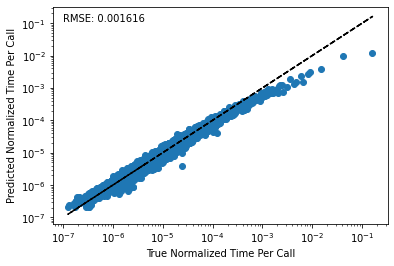

In [96]:
Y_hat = model.predict_normed(X_val)
plt.scatter(Y_val, Y_hat)
plt.plot(Y_val, Y_val, 'k--')
target = 'Normalized Time Per Call'
rmse = np.mean((Y_val.values - Y_hat[:, 0])**2)**0.5
plt.xlabel("True %s" %(target))
plt.ylabel("Predicted %s" %(target))
plt.text(1e-7, 0.7*max((Y_val)), "RMSE: %.6f" %(rmse))
plt.xscale('log')
plt.yscale('log')
plt.show()

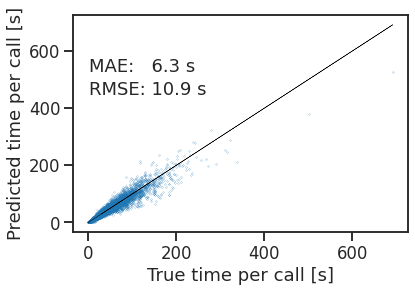

In [6]:
X_val_normlog = ut.denormlog(X_val, m_tpc.drop(target), s_tpc.drop(target))
scaling = X_val_normlog['n_el^3']*X_val_normlog['n_k']/X_val_normlog['n_cores']
yt = Y_vals * scaling
yp = Y_hats[:, 0] * scaling

plt.scatter(yt, yp, s=.05)
plt.plot(yt, yt, 'k-', lw= .5)
rmse = mean_squared_error(yt, yp)**0.5
plt.xlabel("True time per call [s]")
plt.ylabel("Predicted time per call [s]")
plt.text(1, 0.85*max((yp)), "RMSE: %.1f s" %(rmse))
plt.text(1, 1*max((yp)), "MAE:   %.1f s" %(abs(yt - yp).mean()))
plt.show()

In [7]:
df_normlog

,$\dfrac{t \cdot N_{cores}}{N_{call} N_{e}^3 N_{k} }$,time_per_call,n_el,n_el^3,n_species,n_at,n_transition,n_lanthanid,n_ks,n_g_smooth,n_k,n_betas,n_cores,n_nodes,threads_per_node,n_pool,arch
1,0.496010,-4.867321,-0.907232,-0.907232,-3.933900,-0.971765,1.688709,-0.514115,-0.933385,-2.575611,-2.057401,-1.418089,5.053195,5.053195,-8.496318,4.846450,-6.752956
2,-1.473661,-3.115084,1.596579,1.596579,-3.933900,1.236636,1.688709,-0.514115,1.629528,-0.517492,-3.829250,1.378556,5.053195,5.053195,8.502310,-0.207266,-6.752956
3,-2.302590,-2.957217,1.596579,1.596579,-3.933900,1.236636,1.688709,-0.514115,1.629528,-0.517492,-3.829250,1.378556,-0.227302,-0.227302,-8.496318,-0.207266,-6.752956
4,0.871817,-3.575385,-0.907232,-0.907232,-3.933900,-0.971765,1.688709,-0.514115,-0.933385,-2.575611,-2.057401,-1.418089,2.412947,2.412947,-8.496318,-0.207266,-6.752956
5,0.651275,-4.629002,-0.907232,-0.907232,-3.933900,-0.971765,1.688709,-0.514115,-0.933385,-2.575611,-2.057401,-1.418089,5.053195,5.053195,-8.496318,4.846450,-6.752956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41630,0.480418,-1.297621,-0.568389,-0.568389,-1.575747,-0.971765,1.688709,-0.514115,-0.578817,-1.517924,-0.678219,-1.147888,-0.227302,-0.227302,0.002996,-0.207266,0.148083
41631,-0.339179,0.885224,0.299819,0.299819,2.161836,0.564886,-0.590980,-0.514115,0.304041,0.222801,0.612093,0.507454,-0.227302,-0.227302,0.002996,-0.207266,0.148083
41632,-0.754617,0.181255,0.806302,0.806302,-0.196316,0.625590,-0.590980,-0.514115,0.819359,0.069577,-0.847926,0.864857,-0.227302,-0.227302,0.002996,-0.207266,0.148083
41633,0.361096,-0.286340,-0.459840,-0.459840,-1.575747,-0.456148,-0.590980,-0.514115,-0.468370,-0.948174,0.298623,-1.029264,-0.227302,-0.227302,0.002996,-0.207266,0.148083


In [1]:
def get_optimal_parallelization(m, nel, ncores):
    yopt = 1e6
    threads_per_node = np.array([2, 4, 8])
    npool = np.array([1, 2, 4, 8])
    x_ = np.array([a for a in itertools.product(threads_per_node, npool)])
    x_ = np.hstack([nel*np.ones((len(x_), 1)), ncores*np.ones((len(x_), 1)), x_])
    x_ = x_[x_[:, 3] <= x_[:, 1]]
    y = denorm(m.predict(norm(x_))[0])
    yopt = np.min(y)
    xopt = np.round(x_[np.argmin(y)])
    return xopt, yopt


yopt_pred = []
yopt_true = []
xopt_pred = []
xopt_true = []
yopt_xopt = []
ymean = []

for x in X_val:
    yopt = 1e6
    nel = denorm(x)[0]
    ncores = denorm(x)[1]
    xopt, yopt = get_optimal_parallelization(m, nel, ncores)
    xopt_pred.append(xopt)
    yopt_pred.append(yopt)
    yopt_xopt.append(df_x.loc[(df_x['nel^3'] == xopt[0]) & (df_x.n_cores == xopt[1]) & 
                              (df_x['Threads per node'] == xopt[2]) & (df_x.dims_npool == xopt[3])].mean()['Norm. Time Per Call'])
    yopt_true_ = df_x[(df_x['nel^3'] == xopt[0]) & (df_x.n_cores == xopt[1])].min()['Norm. Time Per Call']
    yopt_true.append(yopt_true_)
    xopt_true.append(df_x[df_x['Norm. Time Per Call'] == yopt_true_].values[0, 1:])
    
    ymean.append(df_x[(df_x['nel^3'] == xopt[0]) & (df_x.n_cores == xopt[1])].mean()['Norm. Time Per Call'])
    
yopt_pred = np.array(yopt_pred)
yopt_true = np.array(yopt_true)
xopt_pred = np.array(xopt_pred)
xopt_true = np.array(xopt_true)
yopt_xopt = np.array(yopt_xopt)
ymean     = np.array(ymean)

NameError: name 'X_val' is not defined